EDA

In [453]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

BIKE DETAILS EDA

In [455]:
DF = pd.read_csv(r"C:\Users\guruk\Downloads\BIKE DETAILS.csv")

In [457]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [47]:
df.shape

(1061, 7)

1). What is the range of selling prices in the dataset ?


In [67]:
min_price = DF['selling_price'].min()
max_price = DF['selling_price'].max()

price_range = max_price - min_price

print(f"The range of selling prices is from {min_price} to {max_price} , With a Range of - '{price_range}'.")


The range of selling prices is from 5000 to 760000 , With a Range of - '755000'.


2).  What is the median selling price for bikes in the dataset ?


In [75]:
median_price = DF['selling_price'].median()

print(f"The median selling price is - {median_price}.")


The median selling price is - 45000.0.


3). What is the most common seller type ?


In [88]:
most_common_seller_type = DF['seller_type'].mode()[0]

print(f"The most common seller type is -'{most_common_seller_type}'.")


The most common seller type is -'Individual'.


4). How many bikes have driven more than 50,000 kilometers?


In [104]:
bikes_above_50000 = DF[DF['km_driven'] > 50000]

count_bikes_above_50000 = bikes_above_50000.shape[0]

print(f"There are  '{bikes_above_50000.shape[0]}'  bikes that have driven more than 50,000 kilometers.")


There are  '170'  bikes that have driven more than 50,000 kilometers.


5).What is the average km_driven value for each ownership type ?


In [112]:
average_km_by_ownership = DF.groupby('owner')['km_driven'].mean()

print(average_km_by_ownership)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6). What proportion of bikes are from the year 2015 or older?


In [135]:
bikes_2015_or_older = DF[DF['year'] <= 2015]

proportion = bikes_2015_or_older.shape[0] / DF.shape[0]

print(f"The proportion of bikes from the year 2015 or older is '{proportion:.2f}'.")


The proportion of bikes from the year 2015 or older is '0.57'.


7). What is the trend of missing values across the dataset


In [169]:
missing_values_per_column = DF.isnull().sum()
print(missing_values_per_column)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


8). What is the highest ex_showroom_price recorded, and for which bike?


In [201]:
highest_price_row = DF.loc[DF['ex_showroom_price'].idxmax()]

highest_ex_showroom_price = highest_price_row['ex_showroom_price']

bike_with_highest_price = highest_price_row['name']

print(f"The highest ex-showroom price recorded is '{highest_ex_showroom_price}' for the bike:- '{bike_with_highest_price}'.")


The highest ex-showroom price recorded is '1278000.0' for the bike:- 'Harley-Davidson Street Bob'.


9). What is the total number of bikes listed by each seller type ?


In [304]:
bikes_by_seller_type = DF.groupby('seller_type').size()

print(bikes_by_seller_type)

seller_type
Dealer           6
Individual    1055
dtype: int64


10). What is the relationship between selling_price and km_driven for first-owner bikes ?


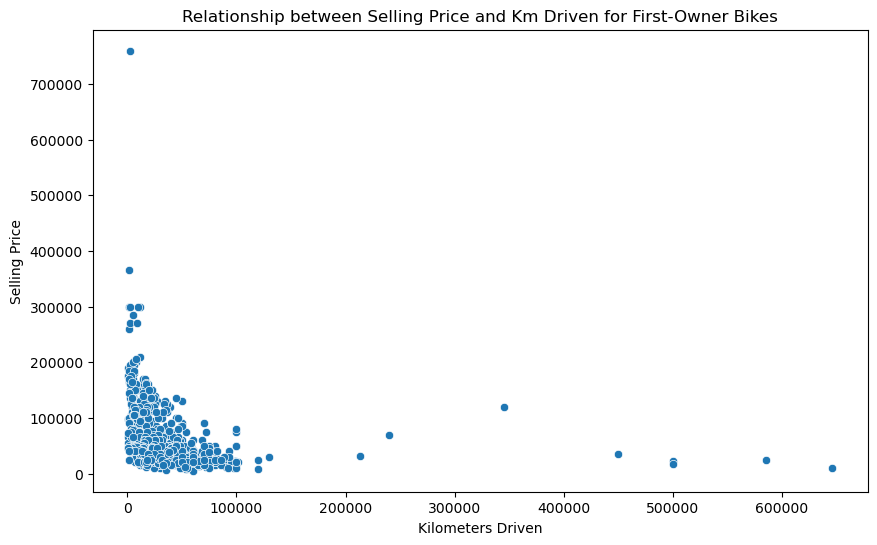

The correlation between selling price and kilometers driven for first-owner bikes is: '-0.24'


In [328]:
first_owner_bikes = DF[DF['owner'] == '1st owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"The correlation between selling price and kilometers driven for first-owner bikes is: '{correlation:.2f}'")


11). Identify and remove outliers in the km_driven column using the IQR method ?


In [349]:
Q1 = DF['km_driven'].quantile(0.25)
Q3 = DF['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(DF['km_driven'] < lower_bound) | (DF['km_driven'] > upper_bound)]

print(f"Outliers in 'km_driven' column based on IQR method:\n{outliers}")

filtered_data =DF[(DF['km_driven'] >= lower_bound) & (DF['km_driven'] <= upper_bound)]

print(f"Number of rows before removing outliers: {DF.shape[0]}")
print(f"Number of rows after removing outliers: {filtered_data.shape[0]}")


Outliers in 'km_driven' column based on IQR method:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  

12). Perform a bivariate analysis to visualize the relationship between year and selling_price ?


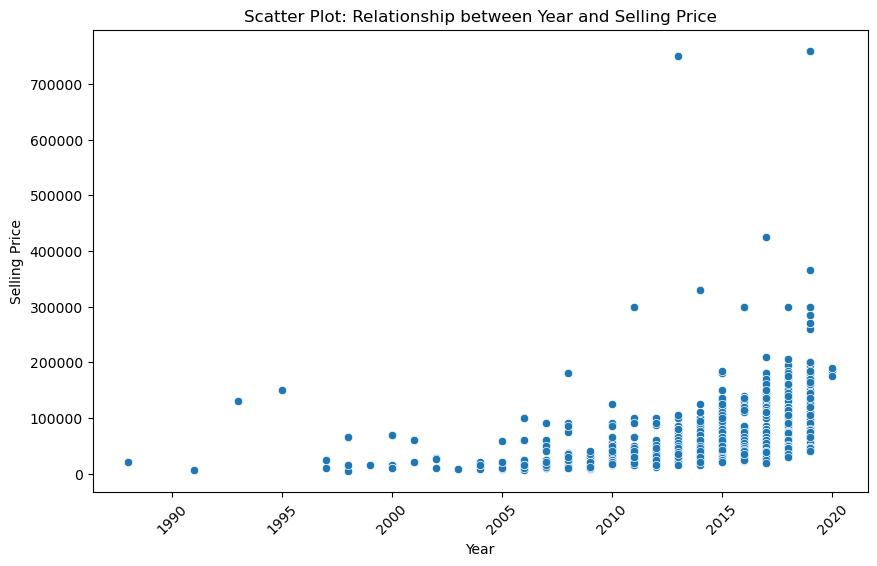

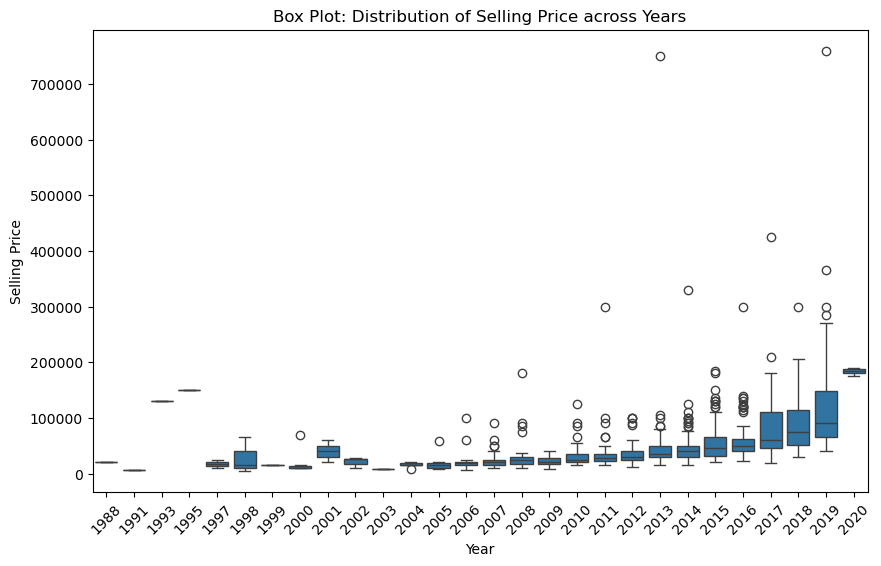

In [364]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=DF)
plt.title('Scatter Plot: Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45) 
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=DF)
plt.title('Box Plot: Distribution of Selling Price across Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


13). What is the average depreciation in selling price based on the bike's age (current year - manufacturing)
year

In [406]:
import pandas as pd

current_year = 2025

DF['bike_age'] = current_year - DF['year']

DF['depreciation'] = DF['ex_showroom_price'] - DF['selling_price']

average_depreciation_by_age = DF.groupby('bike_age')['depreciation'].mean()

print(average_depreciation_by_age)


bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


14). Which bike names are priced significantly above the average price for their manufacturing year ?


In [436]:
average_prices = df.groupby('year')['selling_price'].mean().reset_index()
average_prices.rename(columns={'selling_price': 'average_price'}, inplace=True)

df_merged = pd.merge(df, average_prices, on='year')

# Step 4: Identify bikes that are priced above the average price for their year
df_merged['priced_above_average'] = df_merged['selling_price'] > df_merged['average_price']

# Step 5: Filter bikes that are priced above the average
bikes_above_average = df_merged[df_merged['priced_above_average']]

# Step 6: Display the result
print("Bikes priced above the average selling price for their manufacturing year:")
bikes_above_average[['name', 'selling_price', 'year', 'average_price']]


Bikes priced above the average selling price for their manufacturing year:


,name,selling_price,year,average_price
0,Royal Enfield Classic 350,175000,2019,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,34289.285714
13,Yamaha YZF R3,365000,2019,119689.511628
...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,58469.018692
1005,TVS Apache RTR 160,60000,2014,48668.131868
1008,Bajaj Pulsar 220 F,52000,2012,35748.400000
1012,Bajaj Pulsar NS 200,50000,2014,48668.131868


15). Develop a correlation matrix for numeric columns and visualize it using a heatmap?


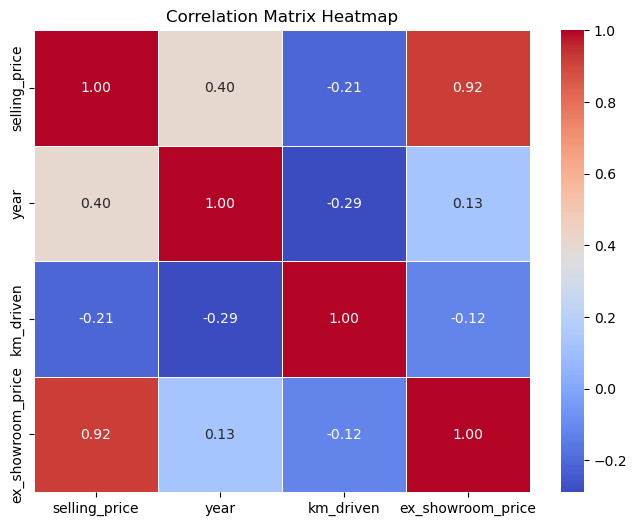

In [448]:
numeric_columns = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']]

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


Car Sales

In [478]:
df2 = pd.read_csv(r"C:\Users\guruk\Downloads\Car Sale.csv")

In [482]:
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [490]:
df2.shape

(23906, 16)

In [499]:
df2.Dealer_Name.unique()

array(["Buddy Storbeck's Diesel Service Inc", 'C & M Motors Inc',
       'Capitol KIA', 'Chrysler of Tri-Cities', 'Chrysler Plymouth',
       'Classic Chevy', 'Clay Johnson Auto Sales', 'U-Haul CO',
       'Rabun Used Car Sales', 'Race Car Help', 'Saab-Belle Dodge',
       'Scrivener Performance Engineering', 'Diehl Motor CO Inc',
       'Star Enterprises Inc', 'Suburban Ford', 'Tri-State Mack Inc',
       'Progressive Shippers Cooperative Association No',
       'Ryder Truck Rental and Leasing', 'Enterprise Rent A Car',
       'Gartner Buick Hyundai Saab', 'Hatfield Volkswagen',
       'Iceberg Rentals', 'McKinney Dodge Chrysler Jeep',
       'Motor Vehicle Branch Office', 'Nebo Chevrolet',
       'New Castle Ford Lincoln Mercury', 'Pars Auto Sales',
       'Pitre Buick-Pontiac-Gmc of Scottsdale'], dtype=object)

1). What is the average selling price of cars for each dealer, and how does it compare across different dealers ?


In [514]:
avg_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
avg_price_by_dealer

,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


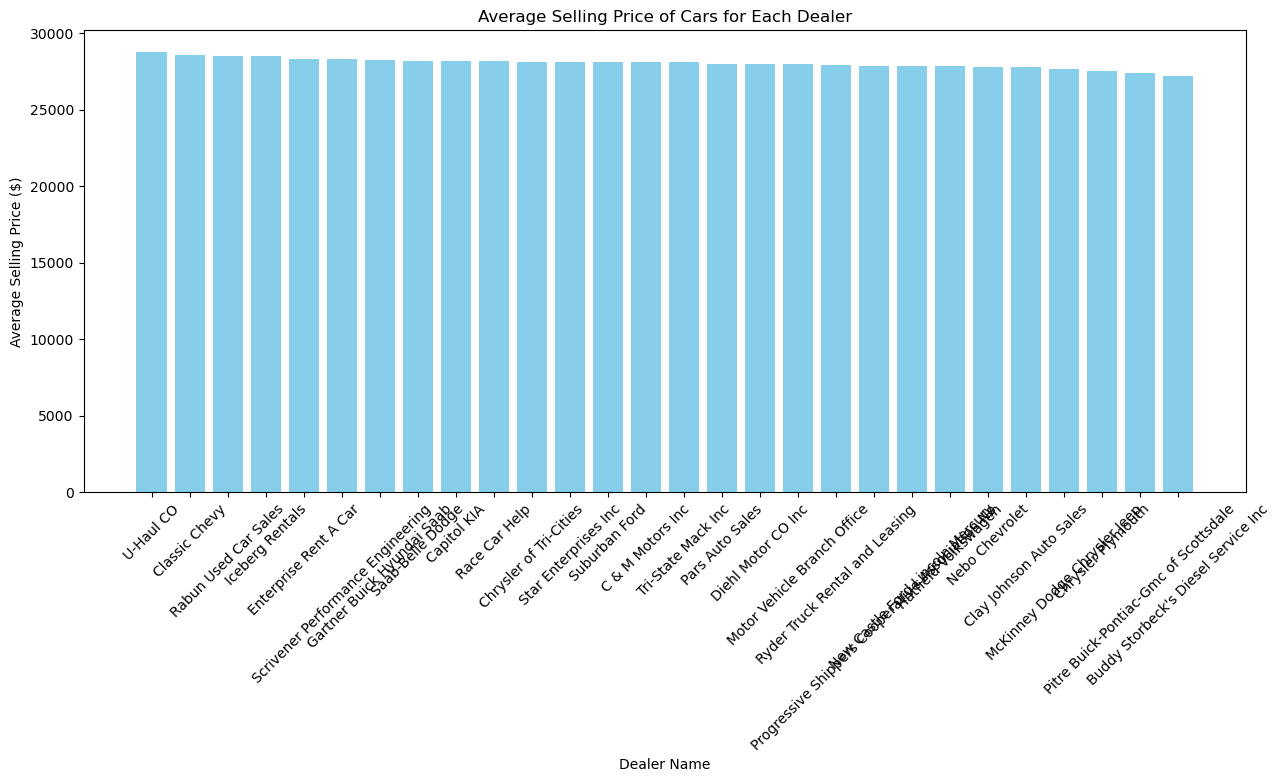

In [518]:
avg_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

avg_price_by_dealer_sorted = avg_price_by_dealer.sort_values(by='Price ($)', ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(avg_price_by_dealer_sorted['Dealer_Name'], avg_price_by_dealer_sorted['Price ($)'], color='skyblue')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price of Cars for Each Dealer')
plt.xticks(rotation=45)
plt.show()

2).  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing 
trends

In [533]:
price_variation_by_company = df2.groupby('Company')['Price ($)'].std().reset_index()

highest_variation = price_variation_by_company.loc[price_variation_by_company['Price ($)'].idxmax()]

print(f"The car brand with the highest variation in prices is {highest_variation['Company']} with a price variation (standard deviation) of ${highest_variation['Price ($)']:.2f}")


The car brand with the highest variation in prices is Lincoln with a price variation (standard deviation) of $19658.05


In [529]:
highest_variation

Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object

3). What is the distribution of car prices for each transmission type, and how do the interquartile ranges 
compare ?

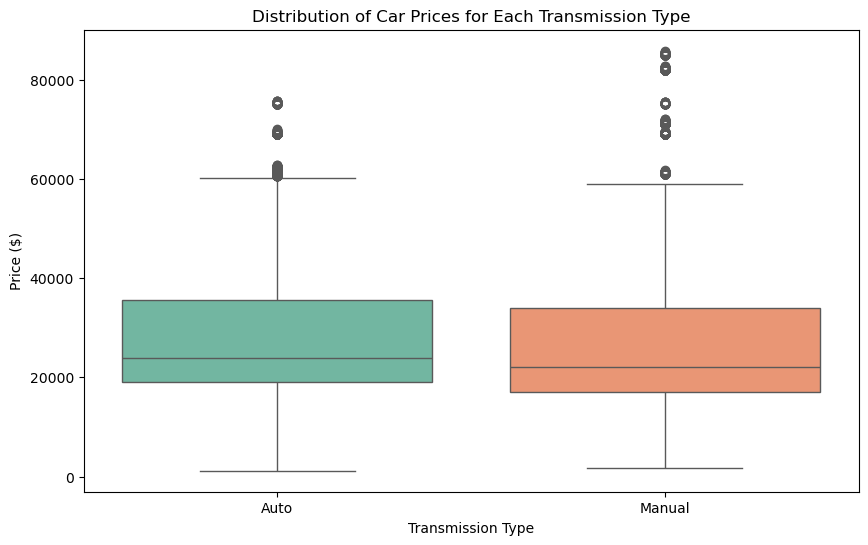

Interquartile Range (IQR) for Each Transmission Type:
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [560]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df2, palette='Set2')

plt.title('Distribution of Car Prices for Each Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

iqr_by_transmission = df2.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_by_transmission['IQR'] = iqr_by_transmission[0.75] - iqr_by_transmission[0.25]

print("Interquartile Range (IQR) for Each Transmission Type:")
print(iqr_by_transmission[['IQR']])


4). What is the distribution of car prices across different regions ?


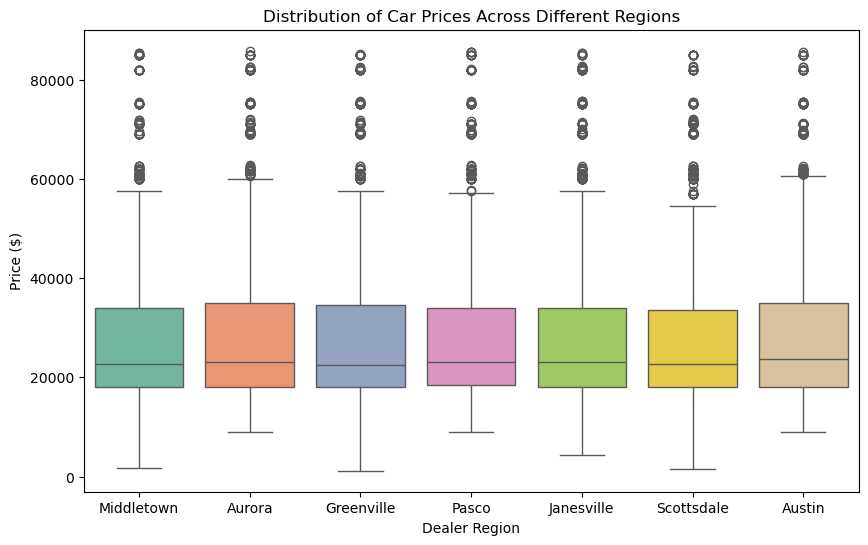

Summary Statistics (Median, Mean, IQR) for Each Region:
  Dealer_Region          mean      50%      IQR
0        Aurora  28334.626837  23000.0  16999.0
1        Austin  28341.603628  23801.0  17000.0
2    Greenville  28180.819054  22500.0  16499.0
3    Janesville  27833.350955  23000.0  15999.0
4    Middletown  27856.338875  22750.0  16000.0
5         Pasco  28119.039923  23000.0  15499.5
6    Scottsdale  27954.958928  22600.0  15500.0


In [583]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2, palette='Set2')

plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.show()

summary_stats_by_region = df2.groupby('Dealer_Region')['Price ($)'].describe().reset_index()

summary_stats_by_region['IQR'] = summary_stats_by_region['75%'] - summary_stats_by_region['25%']

print("Summary Statistics (Median, Mean, IQR) for Each Region:")
print(summary_stats_by_region[['Dealer_Region', 'mean', '50%', 'IQR']])

5). What is the distribution of cars based on body styles?


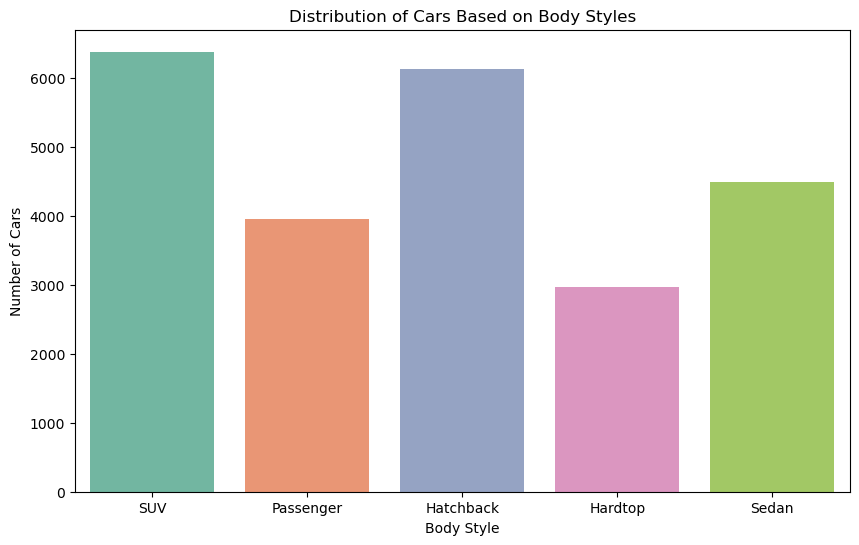

In [588]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df2, palette='Set2')

plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.show()


6).How does the average selling price of cars vary by customer gender and annual income


In [734]:
df2['Income Range'] = pd.cut(df2['Annual Income'], bins=[0,100000, 500000, 5000000, 10000000, 20000000],labels=['Very Low','Low', 'Medium', 'High', 'Very High'])
df2['Income Range']

0        Very Low
1          Medium
2          Medium
3        Very Low
4          Medium
           ...   
23901    Very Low
23902      Medium
23903      Medium
23904    Very Low
23905      Medium
Name: Income Range, Length: 23906, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [736]:
avg_price_by_gender_income = df2.groupby(['Gender', 'Income Range'])['Price ($)'].mean().reset_index()
avg_price_by_gender_income

,Gender,Income Range,Price ($)
0,Female,Very Low,28132.038732
1,Female,Low,28635.027119
2,Female,Medium,28267.222288
3,Female,High,26750.125000
4,Female,Very High,NaN
5,Male,Very Low,27819.969807
6,Male,Low,28537.169450
7,Male,Medium,28041.485244
8,Male,High,30861.035714
9,Male,Very High,26001.000000


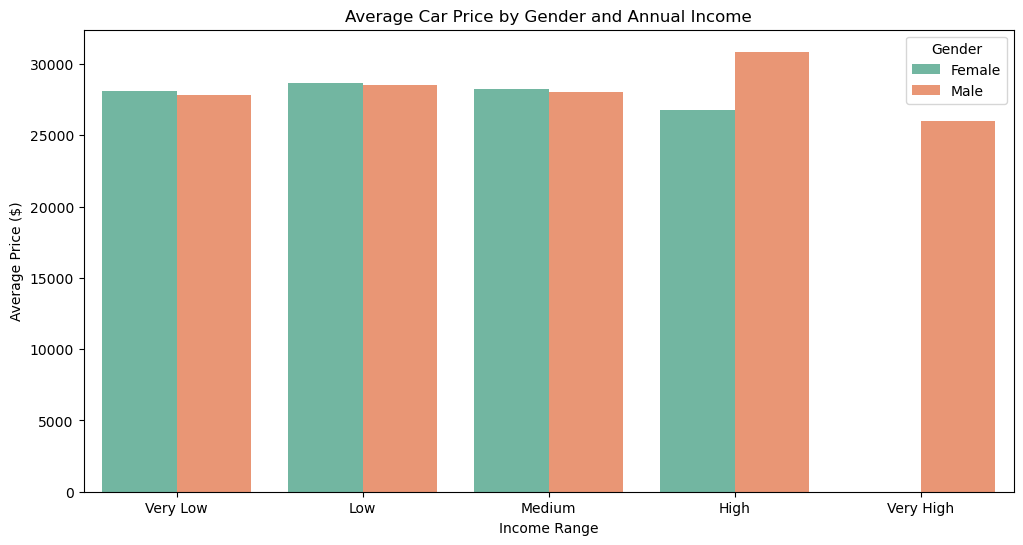

In [738]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Income Range', y='Price ($)', hue='Gender', data=avg_price_by_gender_income, palette='Set2')

# Add titles and labels
plt.title('Average Car Price by Gender and Annual Income')
plt.xlabel('Income Range')
plt.ylabel('Average Price ($)')
plt.show()

In [740]:
summary_stats_by_gender_income = df2.groupby(['Gender', 'Income Range'])['Price ($)'].describe().reset_index()

In [742]:
print("Summary Statistics (Mean, Median, and IQR) by Gender and Income Range:")
print(summary_stats_by_gender_income[['Gender', 'Income Range', 'mean', '50%', '75%', '25%']])


Summary Statistics (Mean, Median, and IQR) by Gender and Income Range:
   Gender Income Range          mean      50%       75%       25%
0  Female     Very Low  28132.038732  22500.5  34000.00  18001.00
1  Female          Low  28635.027119  22500.0  36001.00  18500.00
2  Female       Medium  28267.222288  23000.0  34000.00  18000.00
3  Female         High  26750.125000  28750.0  32000.25  19125.00
4    Male     Very Low  27819.969807  22001.0  34000.00  18000.00
5    Male          Low  28537.169450  24000.0  36000.00  19000.00
6    Male       Medium  28041.485244  23000.0  34000.00  18001.00
7    Male         High  30861.035714  23000.5  39500.00  16750.25
8    Male    Very High  26001.000000  26001.0  26001.00  26001.00


7).  What is the distribution of car prices by region, and how does the number of cars sold vary by region ?


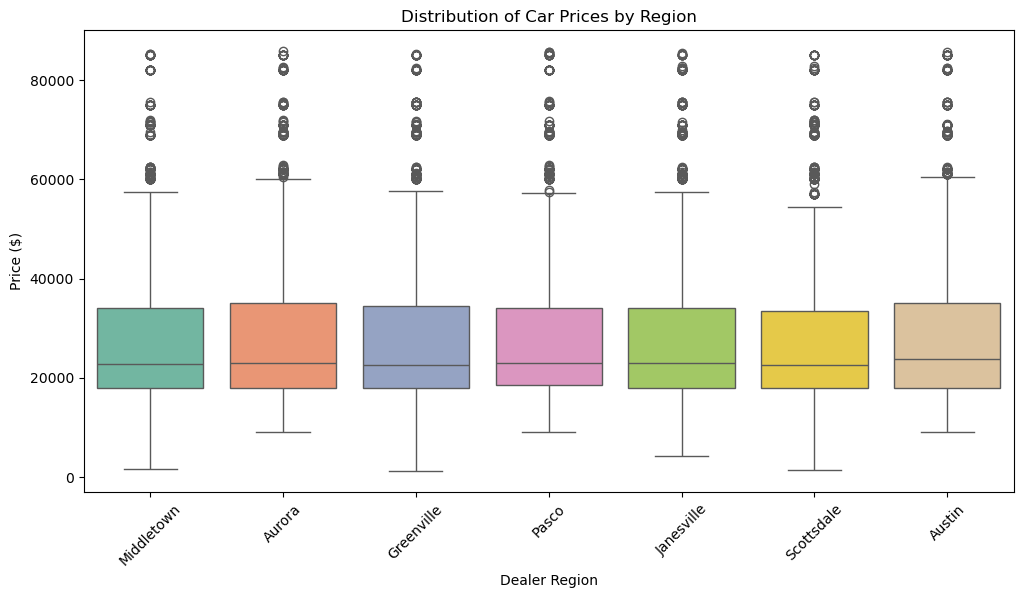

In [772]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2, palette='Set2')

plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45) 
plt.show()

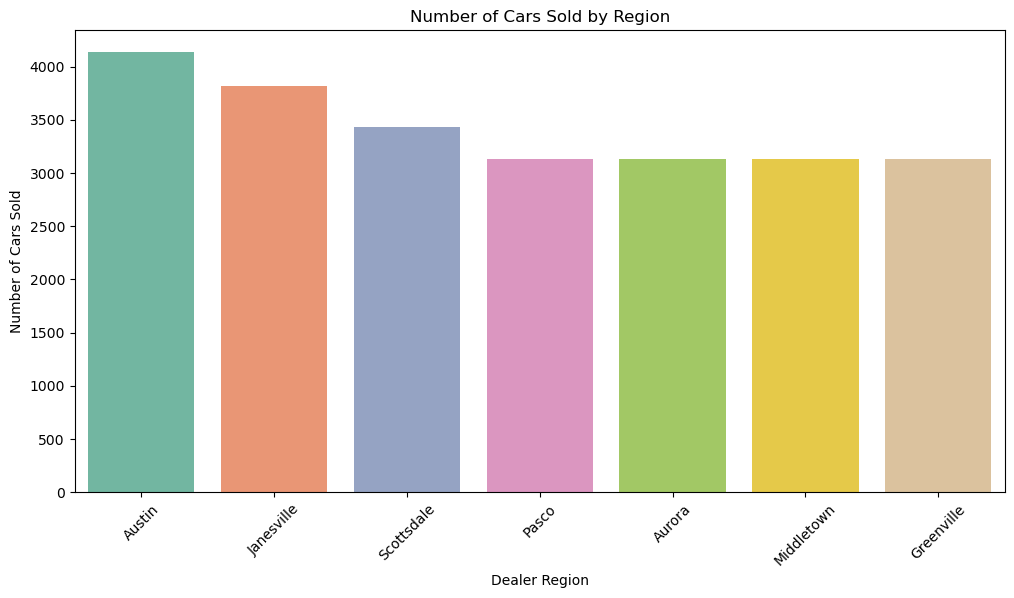

In [774]:
car_count_by_region = df2['Dealer_Region'].value_counts().reset_index()

car_count_by_region.columns = ['Dealer Region', 'Number of Cars Sold']

plt.figure(figsize=(12, 6))
sns.barplot(x='Dealer Region', y='Number of Cars Sold', data=car_count_by_region, palette='Set2')

plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45) 
plt.show()

8). How does the average car price differ between cars with different engine sizes?


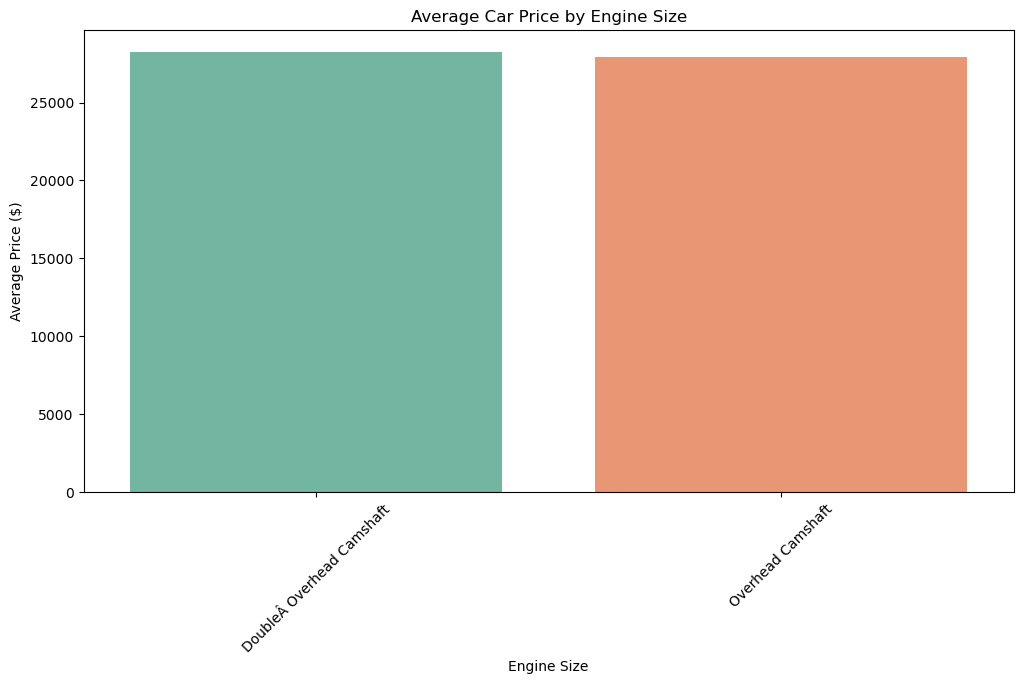

Summary Statistics (Mean, Median, IQR) by Engine Size:
                      Engine          mean      50%      75%      25%
0  DoubleÂ Overhead Camshaft  28248.525972  24000.0  35500.0  19000.0
1          Overhead Camshaft  27914.710631  22001.0  34000.0  17000.0


In [783]:
avg_price_by_engine = df2.groupby('Engine')['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette='Set2')

plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)  
plt.show()

summary_stats_by_engine = df2.groupby('Engine')['Price ($)'].describe().reset_index()

print("Summary Statistics (Mean, Median, IQR) by Engine Size:")
print(summary_stats_by_engine[['Engine', 'mean', '50%', '75%', '25%']])


9).  How do car prices vary based on the customer’s annual income bracket ?


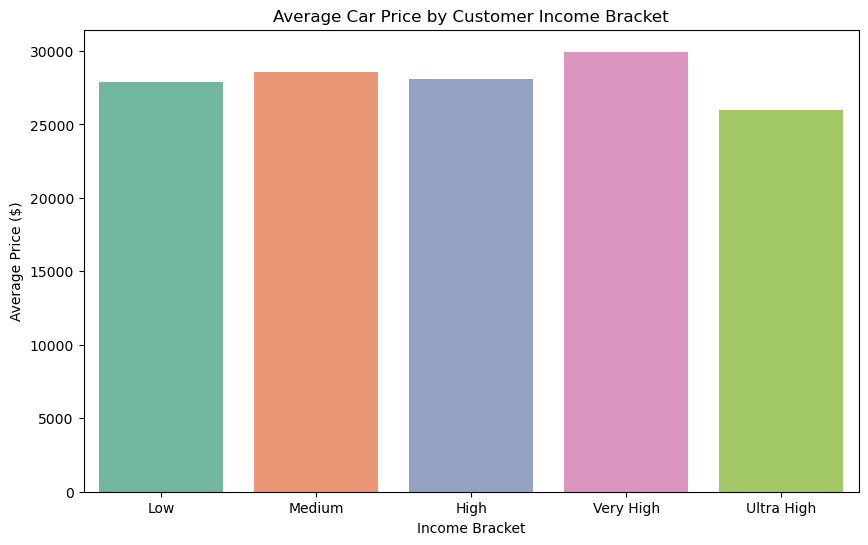

Summary Statistics (Mean, Median, and IQR) by Income Bracket:
  Income Bracket          mean      50%       75%      25%
0            Low  27887.162813  22001.0  34000.00  18000.0
1         Medium  28563.329860  24000.0  36000.00  18501.0
2           High  28087.966191  23000.0  34000.00  18001.0
3      Very High  29947.500000  24001.0  33750.75  16875.0
4     Ultra High  26001.000000  26001.0  26001.00  26001.0


In [817]:
income_bins = [0,100000, 500000, 5000000, 10000000, 20000000]
income_labels = ['Low', 'Medium', 'High', 'Very High', 'Ultra High']

df2['Income Bracket'] = pd.cut(df2['Annual Income'], bins=income_bins, labels=income_labels)

avg_price_by_income_bracket = df2.groupby('Income Bracket')['Price ($)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=avg_price_by_income_bracket, palette='Set2')

plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.show()

summary_stats_by_income_bracket = df2.groupby('Income Bracket')['Price ($)'].describe().reset_index()

print("Summary Statistics (Mean, Median, and IQR) by Income Bracket:")
print(summary_stats_by_income_bracket[['Income Bracket', 'mean', '50%', '75%', '25%']])


10). What are the top 5 car models with the highest number of sales, and how does their price distribution look


In [861]:
sales_by_model = df2['Model'].value_counts().reset_index()

sales_by_model.columns = ['Model', 'Number of Sales']

top_5_models = sales_by_model.head(5)

print("Top 5 Car Models with the Highest Number of Sales:")
print(top_5_models)


Top 5 Car Models with the Highest Number of Sales:
        Model  Number of Sales
0    Diamante              418
1  Silhouette              411
2       Prizm              411
3      Passat              391
4  Ram Pickup              383


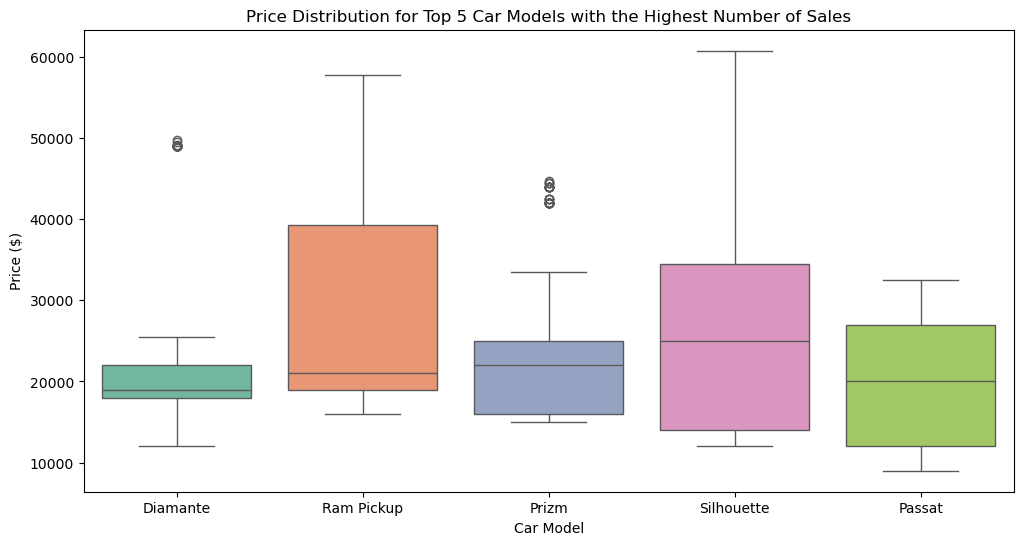

In [863]:
top_5_model_names = top_5_models['Model'].tolist()
df2_top_5 = df2[df2['Model'].isin(top_5_model_names)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=df2_top_5, palette='Set2')

plt.title('Price Distribution for Top 5 Car Models with the Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks.rotation=45
plt.show()


11). How does car price vary with engine size across different car colors, and which colors have the highest price 
variation

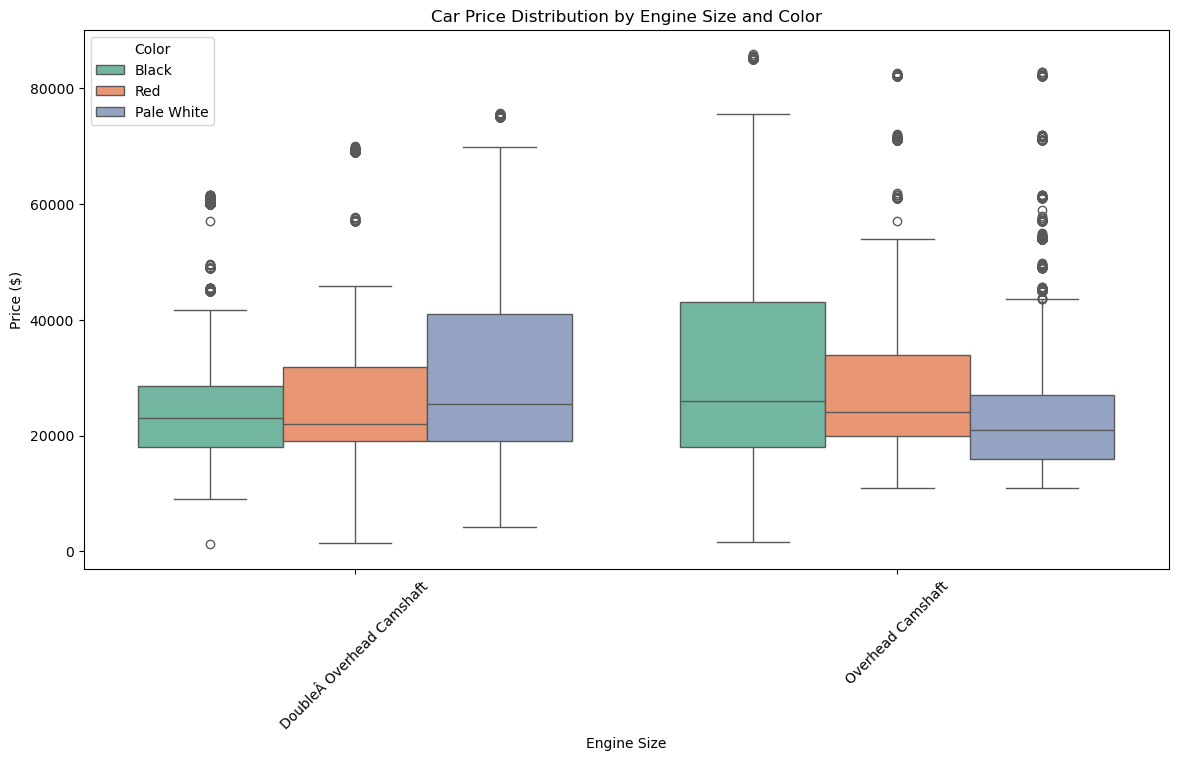

In [875]:
avg_price_by_engine_color = df2.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df2, palette='Set2')

plt.title('Car Price Distribution by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


In [871]:
iqr_by_color = df2.groupby('Color')['Price ($)'].quantile(0.75) - df2.groupby('Color')['Price ($)'].quantile(0.25)

highest_variation_colors = iqr_by_color.sort_values(ascending=False)

print("Car Colors with the Highest Price Variation (IQR):")
print(highest_variation_colors)


Car Colors with the Highest Price Variation (IQR):
Color
Black         18000.0
Pale White    15000.0
Red           15000.0
Name: Price ($), dtype: float64


12). Is there any seasonal trend in car sales based on the date of sale ?


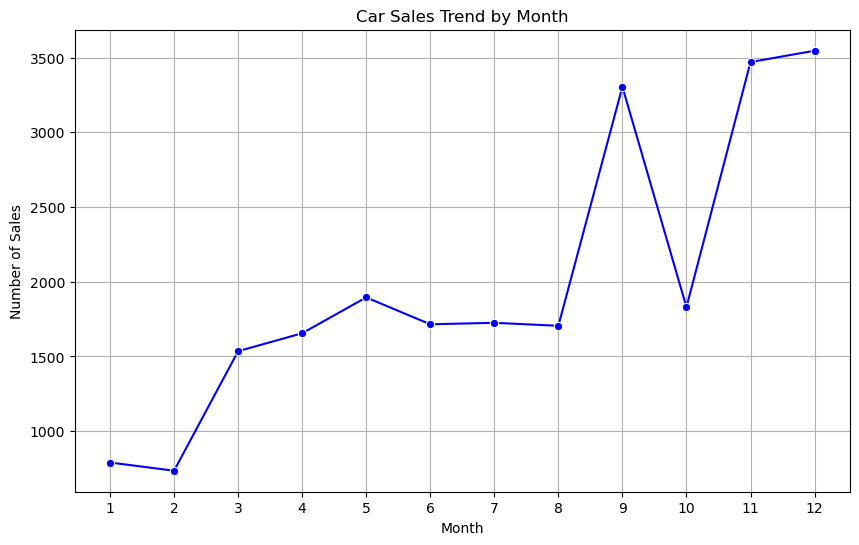

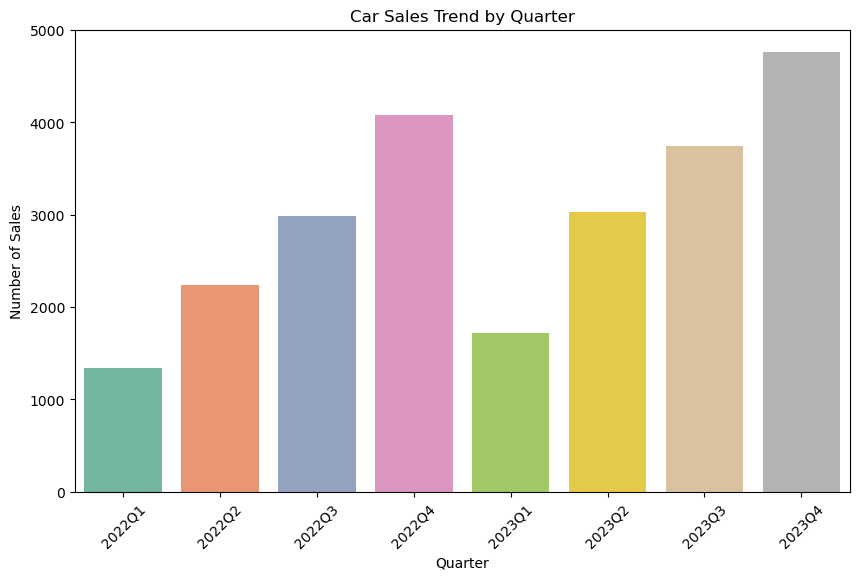

In [912]:

df2['Date'] = pd.to_datetime(df2['Date'])

df2['Month'] = df2['Date'].dt.month
df2['Quarter'] = df2['Date'].dt.to_period('Q')

sales_by_month = df2.groupby('Month').size().reset_index(name='Number of Sales')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Number of Sales', data=sales_by_month, marker='o', color='blue')

plt.title('Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()

sales_by_quarter = df2.groupby('Quarter').size().reset_index(name='Number of Sales')

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Number of Sales', data=sales_by_quarter, palette='Set2')

plt.title('Car Sales Trend by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


13). How does the car price distribution change when considering different combinations of body style and 
transmission type ?

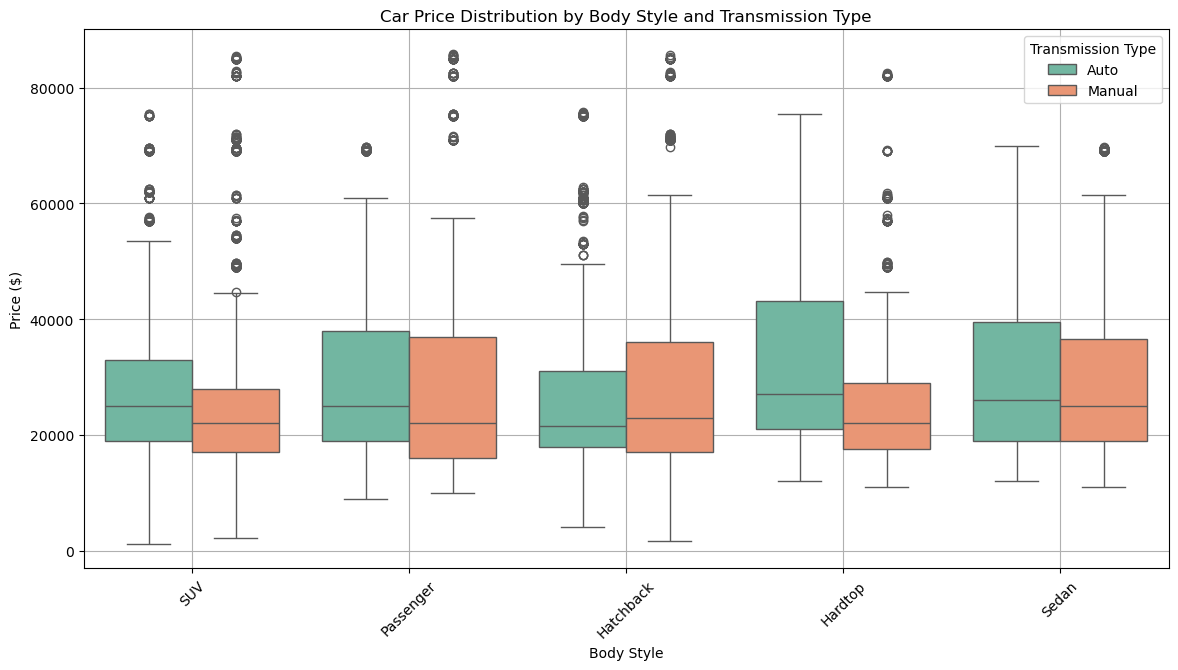

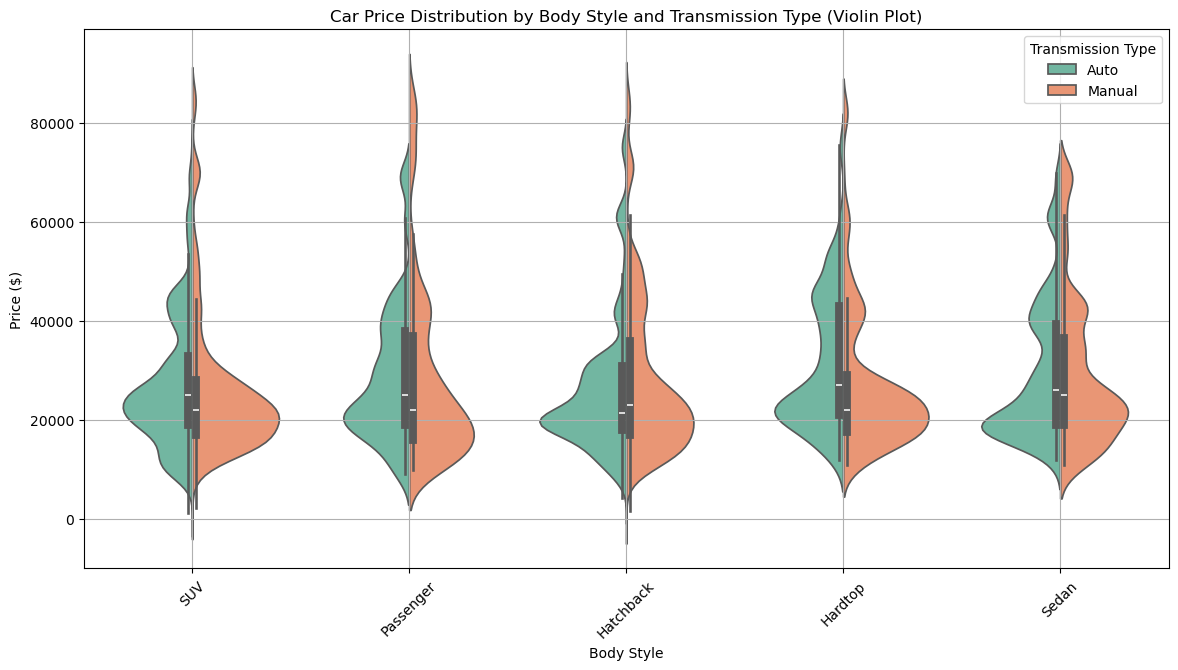

In [917]:
plt.figure(figsize=(14, 7))

sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2, palette='Set2')

plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45) 
plt.legend(title='Transmission Type', loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.violinplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2, split=True, palette='Set2')

plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  
plt.legend(title='Transmission Type', loc='upper right')
plt.grid(True)
plt.title('Car Price Distribution by Body Style and Transmission Type (Violin Plot)')
plt.show()


14). What is the correlation between car price, engine size, and annual income of customers, and how do these 
features interact ?

In [991]:
df2['Engine_NUM'] = df2['Engine'].replace({'Overhead Camshaft': 1, 'DoubleÂ\xa0Overhead Camshaft': 2})


In [993]:
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,...,Dealer_No,Body Style,Phone,Dealer_Region,Income Range,Income Bracket,Month,Quarter,Quarter,Engine_NUM
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,2,Auto,...,06457-3834,SUV,8264678,Middletown,Very Low,Low,1,2022Q1,2022Q1,2
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,2,Auto,...,60504-7114,SUV,6848189,Aurora,Medium,High,1,2022Q1,2022Q1,2
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,1,Manual,...,38701-8047,Passenger,7298798,Greenville,Medium,High,1,2022Q1,2022Q1,1
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,1,Manual,...,99301-3882,SUV,6257557,Pasco,Very Low,Low,1,2022Q1,2022Q1,1
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,2,Auto,...,53546-9427,Hatchback,7081483,Janesville,Medium,High,1,2022Q1,2022Q1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,1,Manual,...,60504-7114,Passenger,8583598,Pasco,Very Low,Low,12,2023Q4,2023Q4,1
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,2,Auto,...,06457-3834,Hardtop,7914229,Middletown,Medium,High,12,2023Q4,2023Q4,2
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,1,Manual,...,99301-3882,Sedan,7659127,Scottsdale,Medium,High,12,2023Q4,2023Q4,1
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,2,Auto,...,53546-9427,Passenger,6030764,Austin,Very Low,Low,12,2023Q4,2023Q4,2


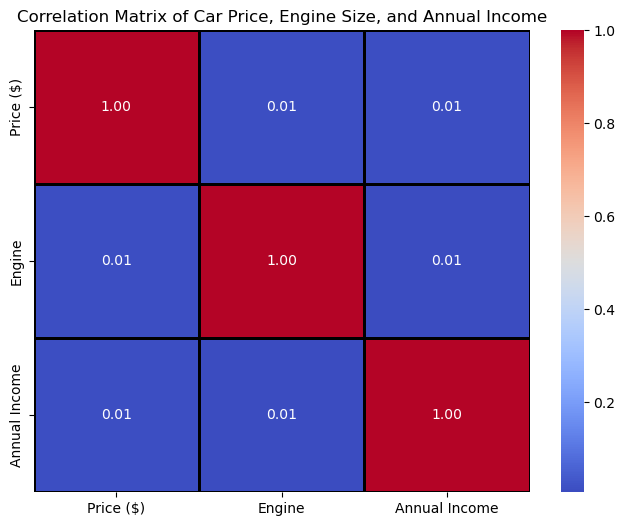

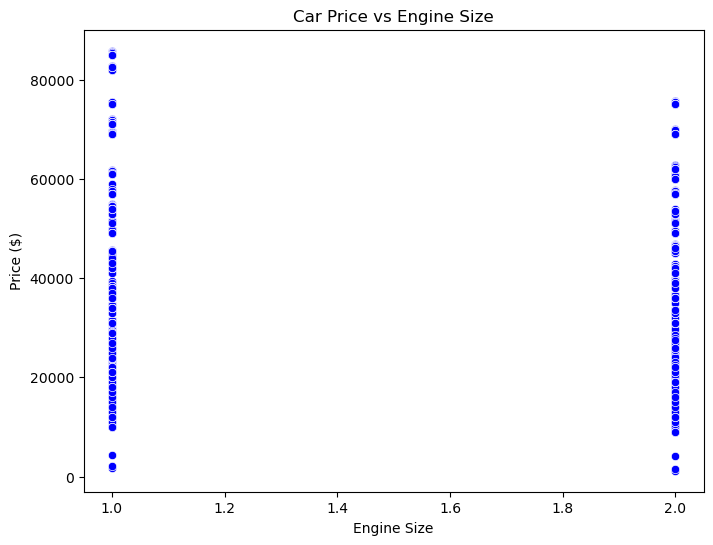

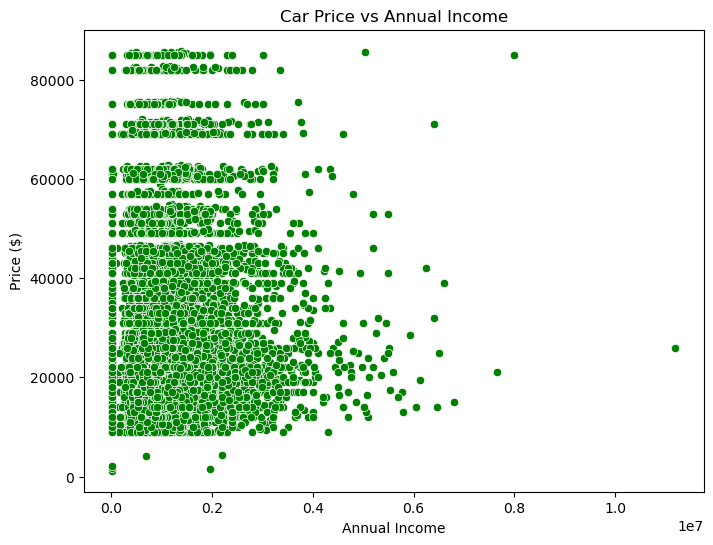

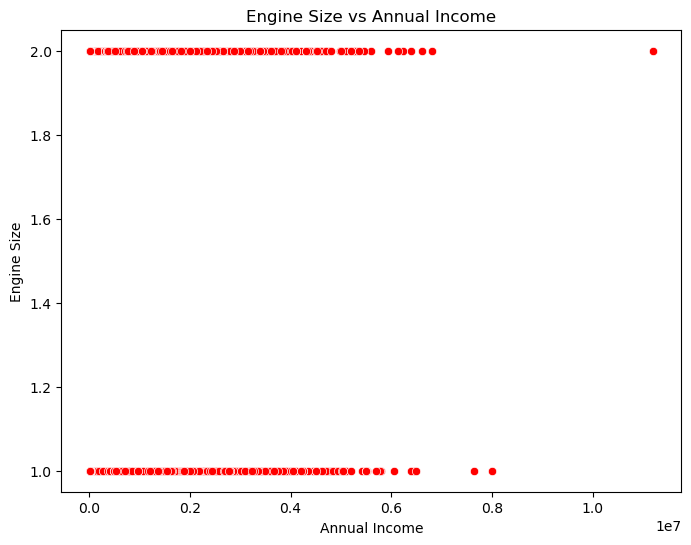

In [995]:
correlation_matrix = df2[['Price ($)', 'Engine', 'Annual Income']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine', y='Price ($)', data=df2, color='blue')
plt.title('Car Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df2, color='green')
plt.title('Car Price vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Engine', data=df2, color='red')
plt.title('Engine Size vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Engine Size')
plt.show()


15). How does the average car price vary across different car models and engine types?


In [1014]:
df2['Engine_str'] = df2['Engine'].replace({1:'Overhead Camshaft', 2 : 'DoubleÂ\xa0Overhead Camshaft'})
df2['Engine_str']

0        DoubleÂ Overhead Camshaft
1        DoubleÂ Overhead Camshaft
2                Overhead Camshaft
3                Overhead Camshaft
4        DoubleÂ Overhead Camshaft
                   ...            
23901            Overhead Camshaft
23902    DoubleÂ Overhead Camshaft
23903            Overhead Camshaft
23904    DoubleÂ Overhead Camshaft
23905    DoubleÂ Overhead Camshaft
Name: Engine_str, Length: 23906, dtype: object

In [1020]:
average_price_by_model_and_engine = df2.groupby(['Model', 'Engine_str'])['Price ($)'].mean().reset_index()

average_price_by_model_and_engine


,Model,Engine_str,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


Amazon

In [1034]:
df3 = pd.read_csv(r"C:\Users\guruk\Downloads\amazon.csv")

In [1036]:
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [1038]:
df3.shape

(1465, 16)

In [1179]:
df3['discounted_price'] = df3['discounted_price'].replace({'₹': '', ',' :''}, regex=True)

df3['discounted_price'] = pd.to_numeric(df3['discounted_price'])

print(df3['discounted_price'].head())

0    399.0
1    199.0
2    199.0
3    329.0
4    154.0
Name: discounted_price, dtype: float64


In [1183]:
df3['actual_price']= df3['actual_price'].replace({'₹':'',',' :''}, regex=True)

In [1187]:
df3['actual_price'] = pd.to_numeric(df3['actual_price'])

In [1193]:
print(df3['actual_price'].sample(4))

372     19999.0
19      21990.0
238       799.0
1043     2000.0
Name: actual_price, dtype: float64


In [1197]:
df3['discount_percentage'] = df3['discount_percentage'].replace({'%': ''}, regex=True)
df3['discount_percentage'] = pd.to_numeric(df3['discount_percentage'])
print(df3['discount_percentage'].head(2))

0    64
1    43
Name: discount_percentage, dtype: int64


In [1208]:
df3['rating_count'] = df3['rating_count'].replace({',' : ''},regex=True)
df3['rating_count'] = pd.to_numeric(df3['rating_count'])
df3.rating_count.head(2)

0    24269.0
1    43994.0
Name: rating_count, dtype: float64

In [1216]:
df3.head(4)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...


1). What is the average rating for each product category?


In [1219]:
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')


In [1221]:
average_rating_by_category = df3.groupby('category')['rating'].mean().reset_index()
average_rating_by_category

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


2). What are the top rating_count products by category?


In [1225]:
top_products_by_category = df3.sort_values(by=['category', 'rating_count'], ascending=[True ,False])

top_products_by_category = top_products_by_category.groupby('category').head(1).reset_index(drop=True)

top_products_by_category[['category', 'product_name', 'rating_count']]


,category,product_name,rating_count
0,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
1,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426.0
2,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222.0
3,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969.0
4,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352.0
...,...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792.0
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,5719.0
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308.0


3). What is the distribution of discounted prices vs. actual prices ?


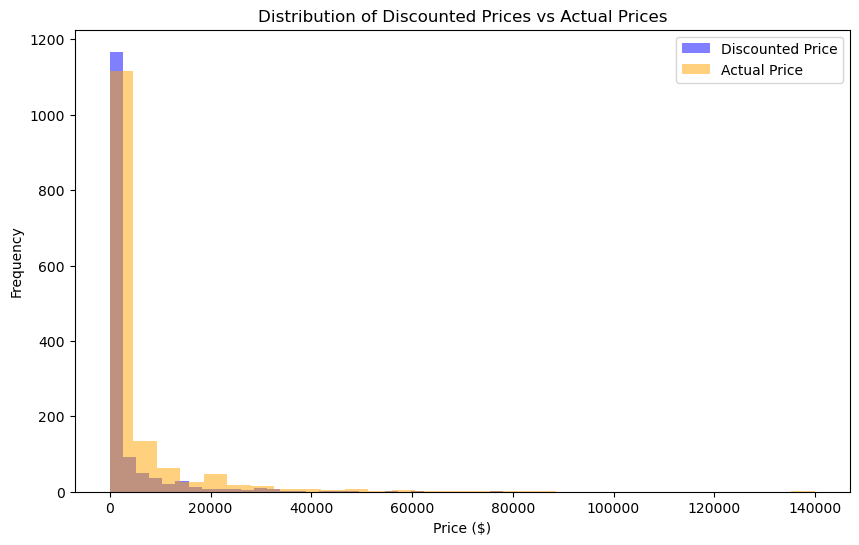

In [1228]:
plt.figure(figsize=(10, 6))

plt.hist(df3['discounted_price'], bins=30, alpha=0.5, label='Discounted Price', color='blue')

plt.hist(df3['actual_price'], bins=30, alpha=0.5, label='Actual Price', color='orange')

plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.legend()

plt.show()


4). How does the average discount percentage vary across categories?


In [1322]:
average_discount_by_category = df3.groupby('category')['discount_percentage'].mean().reset_index()
average_discount_by_category


,category,discount_percentage
0,Car&Motorbike|CarAccessories|InteriorAccessori...,42.0
1,Computers&Accessories|Accessories&Peripherals|...,78.5
2,Computers&Accessories|Accessories&Peripherals|...,35.0
3,Computers&Accessories|Accessories&Peripherals|...,56.5
4,Computers&Accessories|Accessories&Peripherals|...,46.5
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,5.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,17.5
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,13.0


5). What are the most popular product names ?


In [1326]:
most_popular_products = df3.groupby('product_name')['rating_count'].sum().reset_index()

most_popular_products = most_popular_products.sort_values(by='rating_count', ascending=False)

top_10_popular_products = most_popular_products.head(10)
top_10_popular_products


,product_name,rating_count
101,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945.0
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
511,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177.0
1256,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
1257,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
1253,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
900,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
898,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
901,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0


6). What are the most popular product keywords ?


In [1329]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords

df3['text_data'] = df3['product_name'] + " " + df3['about_product'] + " " + df3['review_content']

df3['text_data']


0       Wayona Nylon Braided USB to Lightning Fast Cha...
1       Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2       Sounce Fast Phone Charging Cable & Data Sync U...
3       boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4       Portronics Konnect L 1.2M Fast Charging 3A 8 P...
                              ...                        
1460    Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
1461    Prestige Delight PRWO Electric Rice Cooker (1 ...
1462    Bajaj Majesty RX10 2000 Watts Heat Convector R...
1463    Havells Ventil Air DSP 230mm Exhaust Fan (Pist...
1464    Borosil Jumbo 1000-Watt Grill Sandwich Maker (...
Name: text_data, Length: 1465, dtype: object

7). What are the most popular product reviews ?


In [1336]:
most_popular_reviews = df3[['review_content', 'rating_count']].sort_values(by='rating_count', ascending=False)

top_reviews_by_count = most_popular_reviews.head(10)
print(top_reviews_by_count)

                                        review_content  rating_count
12   i am using it for  days now the experience is ...      426973.0
65   i am using it for  days now the experience is ...      426973.0
47   i am using it for  days now the experience is ...      426973.0
684  i am using it for  days now the experience is ...      426972.0
400  the sound quality of this earphone are really ...      363713.0
352  the sound quality of this earphone are really ...      363713.0
584  the sound quality of this earphone are really ...      363711.0
370  if you want a smart phone for just the use of ...      313836.0
371  if you want a smart phone for just the use of ...      313836.0
473  if you want a smart phone for just the use of ...      313832.0


In [1338]:
most_popular_reviews_by_rating = df3[['review_content', 'rating']].sort_values(by='rating', ascending=False)

top_reviews_by_rating = most_popular_reviews_by_rating.head(10)
print(top_reviews_by_rating)


                                         review_content  rating
324   quick deliveryawesome productpacking was goodj...     5.0
174   product is good in quality working good with m...     5.0
775   i really like this wireless mouse it has becam...     5.0
1145  must buy best fabulous product i recommend thi...     4.8
1201  overall i love this oratech coffee frother and...     4.8
1299  i have used multiple air fryers but this one i...     4.8
249   the delivery people were not careful with the ...     4.7
1388  i like instant heating i didnt get warranty ca...     4.7
1226  the first time i tried it send the eggs and th...     4.7
459   it is easy to install at home the kit has all ...     4.7


In [1340]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords

df3['review_content'] = df3['review_content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)).lower())

vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(df3['review_content'])

word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = word_freq.sum(axis=0).sort_values(ascending=False)

most_popular_review_words = word_counts.head(10)
print(most_popular_review_words)


good        4523
product     2812
quality     2088
use         1493
cable       1236
like        1155
price       1150
using        953
phone        948
charging     873
dtype: int64


8). What is the correlation between discounted_price and rating?


In [1343]:
correlation = df3['discounted_price'].corr(df3['rating'])

print(f"Correlation between discounted_price and rating : {correlation}")


Correlation between discounted_price and rating : 0.12033741712288552


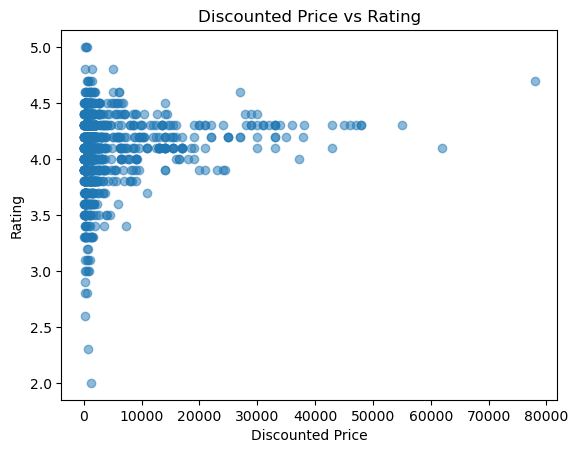

In [1345]:
import matplotlib.pyplot as plt

plt.scatter(df3['discounted_price'], df3['rating'], alpha=0.5)
plt.title('Discounted Price vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()


9). What are the Top 5 categories based on the highest rating ?


In [1351]:

avg_rating_by_category = df3.groupby('category')['rating'].mean()

top_5_categories = avg_rating_by_category.sort_values(ascending=False).head(5)

print(top_5_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64



10). Identify any potential areas for improvement or optimization based on the data analysis.

Spotify

In [1387]:
df4 = pd.read_csv(r"C:\Users\guruk\Downloads\spotify.csv")
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [1389]:
df4.shape

(440, 5)

In [1391]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


1).Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do 
the needful

In [1405]:
null_values = df4.isnull().sum()  
print("Null values in each column:")
print(null_values)

if null_values.any():
    df4['Artist'].fillna('Unknown', inplace=True)
    df4['Track Name'].fillna('Unknown Track', inplace=True)
    df4['Popularity'].fillna(df['Popularity'].mean(), inplace=True)
    df4['Duration (ms)'].fillna(df['Duration (ms)'].mean(), inplace=True)
    df4['Track ID'].fillna('Unknown ID', inplace=True)

duplicates = df4.duplicated().sum()  
print("\nNumber of duplicate rows:", duplicates)

if duplicates > 0:
    df.drop_duplicates(inplace=True)

print("\nCleaned dataframe:")
df4

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Cleaned dataframe:


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


2). What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?


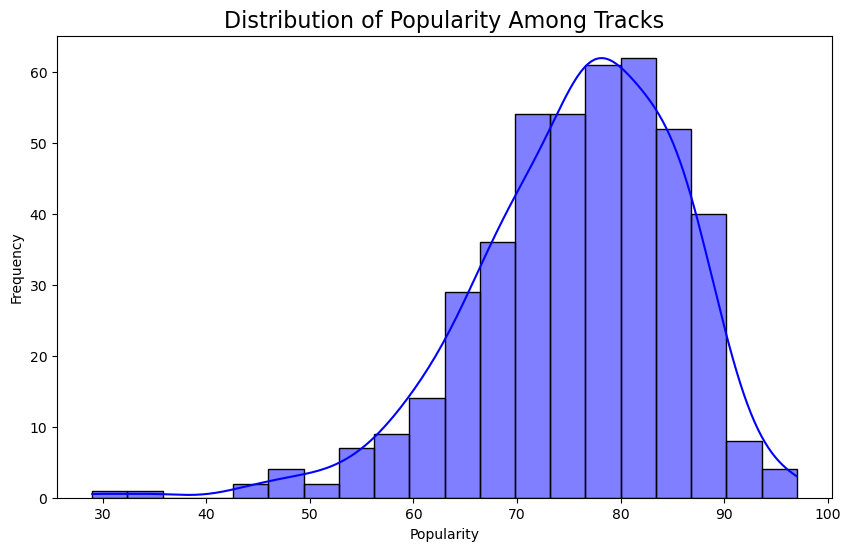

In [1417]:
if df4['Popularity'].isnull().any():
    df4['Popularity'].fillna(df['Popularity'].mean(), inplace=True) 

plt.figure(figsize=(10, 6))
sns.histplot(df4['Popularity'], kde=True, color='blue', bins=20)

plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.show()


3). Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?


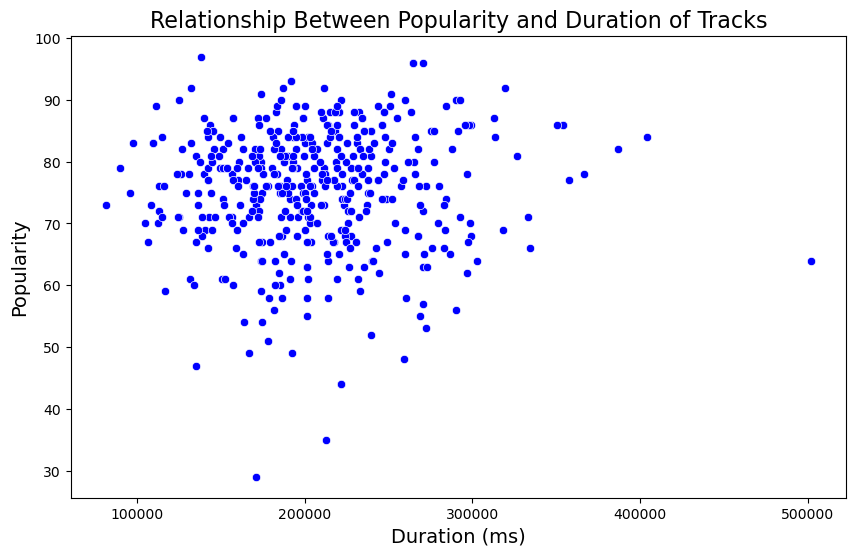

In [1438]:
df4['Popularity'].fillna(df4['Popularity'].mean(), inplace=True) 
df4['Duration (ms)'].fillna(df4['Duration (ms)'].mean(), inplace=True) 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='Duration (ms)', y='Popularity', color='blue')

plt.title('Relationship Between Popularity and Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

plt.show()


4). Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using 
a countplot?

Artist with the highest number of tracks: Drake with 20 tracks


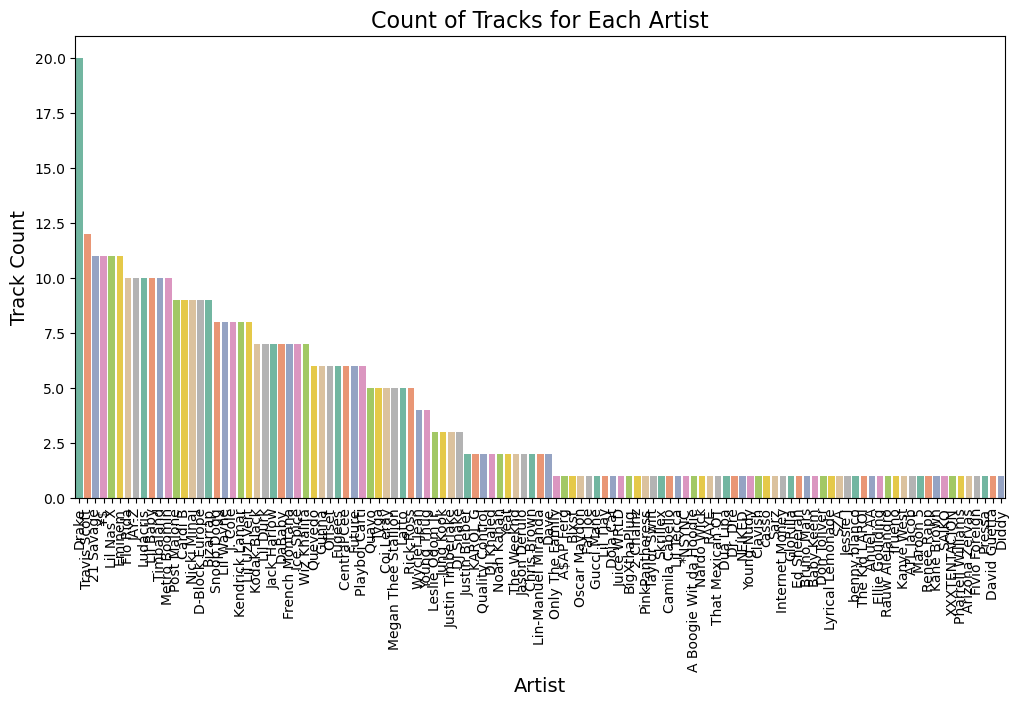

In [1449]:
df4['Artist'].fillna('Unknown Artist', inplace=True)

artist_track_count = df4['Artist'].value_counts().reset_index()
artist_track_count.columns = ['Artist', 'Track Count']

most_tracks_artist = artist_track_count.iloc[0]
print(f"Artist with the highest number of tracks: {most_tracks_artist['Artist']} with {most_tracks_artist['Track Count']} tracks")

plt.figure(figsize=(12, 6))
sns.countplot(data=df4, x='Artist', order=df4['Artist'].value_counts().index, palette='Set2')

plt.title('Count of Tracks for Each Artist', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Track Count', fontsize=14)
plt.xticks(rotation=90)

plt.show()


5). What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each


In [1455]:
df4['Popularity'].fillna(df4['Popularity'].mean(), inplace=True) 

least_popular_tracks = df4.sort_values(by='Popularity', ascending=True).head(5)

top_5_least_popular_tracks = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

top_5_least_popular_tracks


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
435,French Montana,Splash Brothers,44
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


6). Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
display the average popularity for each artist ?

In [1463]:
df4['Popularity'].fillna(df4['Popularity'].mean(), inplace=True)

artist_popularity = df4.groupby('Artist')['Popularity'].sum().reset_index()

top_5_artists = artist_popularity.sort_values(by='Popularity', ascending=False).head(5)

avg_popularity_per_artist = df4[df4['Artist'].isin(top_5_artists['Artist'])] \
                            .groupby('Artist')['Popularity'] \
                            .mean().reset_index()

avg_popularity_per_artist_sorted = avg_popularity_per_artist.sort_values(by='Popularity', ascending=False)

avg_popularity_per_artist_sorted


,Artist,Popularity
3,Travis Scott,87.000000
4,¥$,86.090909
0,21 Savage,84.181818
2,Eminem,83.636364
1,Drake,83.500000


7). For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?


In [1513]:
artist_popularity = df4.groupby('Artist')['Popularity'].sum().reset_index()

top_5_artists = artist_popularity.sort_values(by='Popularity', ascending=False).head(5)

most_popular_tracks = []

for artist in top_5_artists['Artist']:
    artist_tracks = df4[df4['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append({
        'Artist': artist,
        'Track Name': most_popular_track['Track Name'],
        'Popularity': most_popular_track['Popularity']
    })

most_popular_tracks_df = pd.DataFrame(most_popular_tracks)
most_popular_tracks_df


,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
1,Travis Scott,FE!N (feat. Playboi Carti),93
2,¥$,CARNIVAL,96
3,21 Savage,redrum,96
4,Eminem,Without Me,90


8). Visualize relationships between multiple numerical variables simultaneously using a pair plot ?


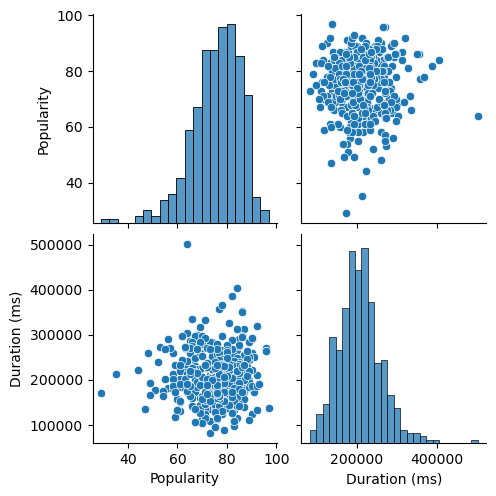

In [1519]:
numerical_columns = ['Popularity', 'Duration (ms)']


sns.pairplot(df4[numerical_columns])

plt.show()


9).Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or 
violin plot ?

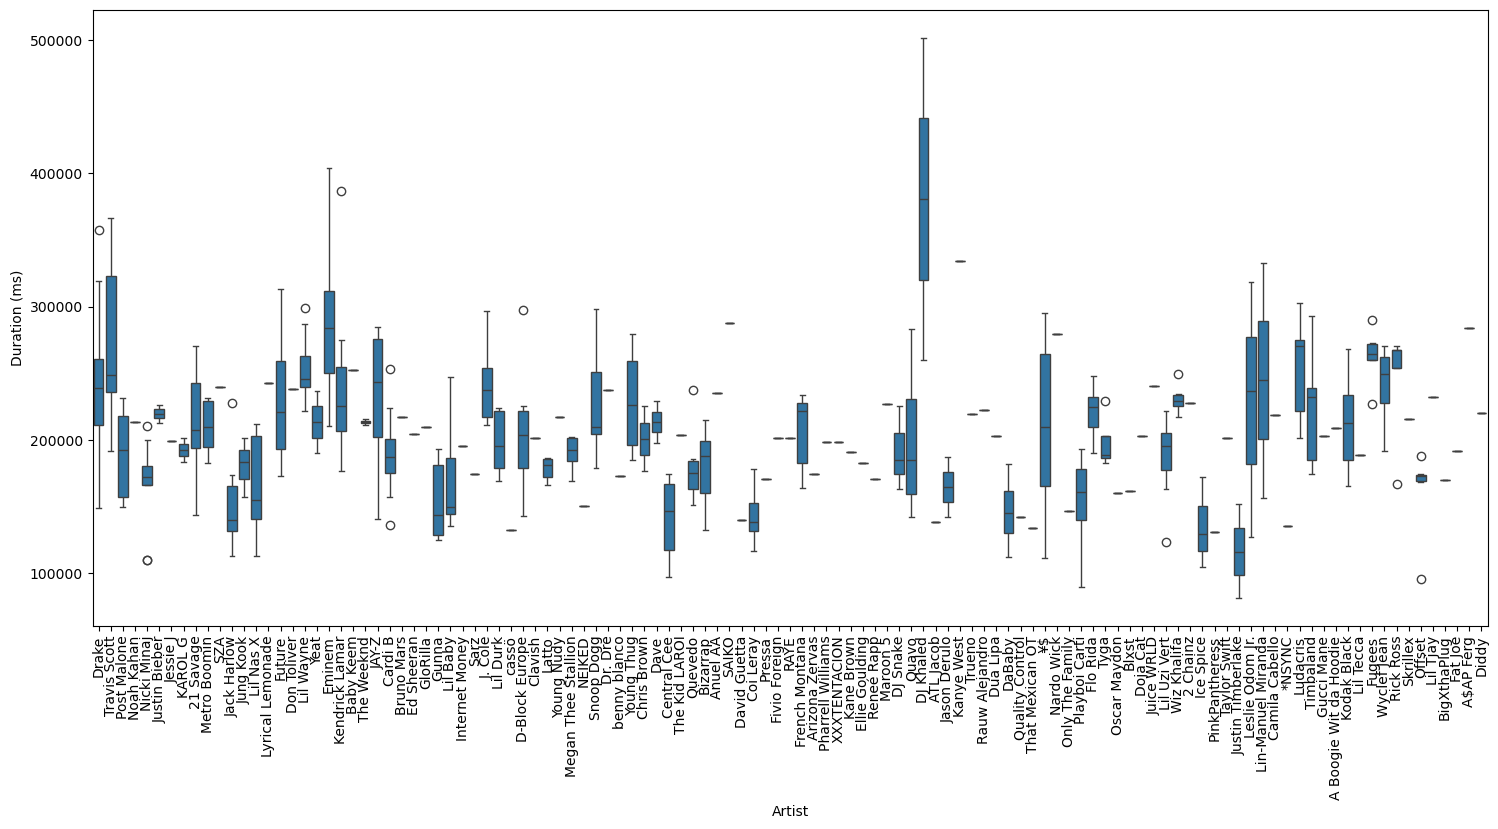

In [1548]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df4)

plt.xticks(rotation=90)

plt.show()

10). How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a 
violin plot?

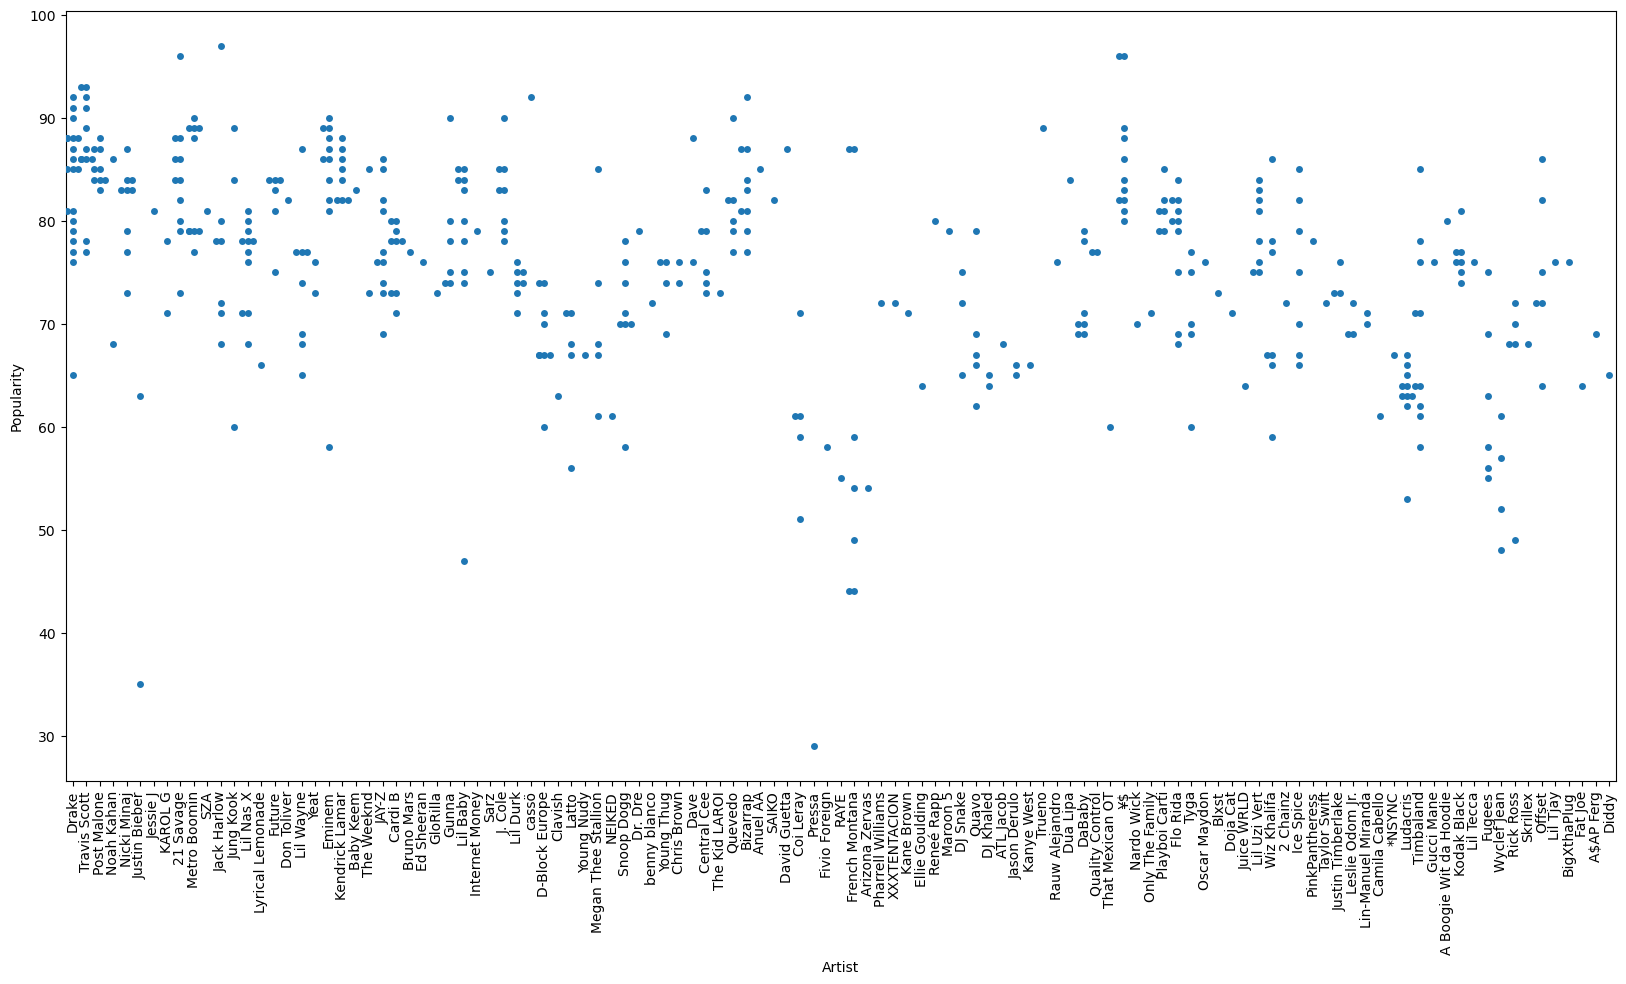

In [1562]:
plt.figure(figsize=(20, 10))
sns.swarmplot(x='Artist', y='Popularity', data=df4)

plt.xticks(rotation=90)

plt.show()
